# BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import glob
import os

# CARREGAMENTO

## CARREGAMENTO, LIMPEZA E TRATAMENTO DOS ARQUIVOS INDIVIDUALMENTE

### 1 - arquivo_csv_1:

In [32]:
arquivo_csv_1 = ('data/processos_1.csv')
df_1 = pd.read_csv(arquivo_csv_1, sep='#', encoding='utf-8')
print(df_1.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_1['data_distribuicao'] = pd.to_datetime(df_1['data_distribuicao'], errors='coerce')
df_1['data_baixa'] = pd.to_datetime(df_1['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_1['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_1['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_1['ano_distribuicao'] = df_1['data_distribuicao'].dt.year
df_1['ano_baixa'] = df_1['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2020 (ou é NaN)
#    - ano_baixa <= 2020 (ou é NaN)
df_limpo1 = df_1[
    (
        (df_1['ano_distribuicao'] <= 2020)
    ) & 
    (
        (df_1['ano_baixa'] <= 2020) | 
        (df_1['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo1.shape}")
print(f"Registros removidos: {len(df_1) - len(df_limpo1)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo1['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo1['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_1) > len(df_limpo1):
    df_removidos = df_1[~df_1.index.isin(df_limpo1.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2020
    ANO = 2020
    dist_maior_ANO = df_1[df_1['ano_distribuicao'] > ANO]
    dist_nula = df_1[df_1['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_1[df_1['ano_baixa'] > ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_1[(df_1['ano_distribuicao'] > ANO) & (df_1['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo1)}")
print(f"Total de colunas: {len(df_limpo1.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo1.head())
print(f"\nTipos de dados:")
print(df_limpo1.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo1['data_distribuicao'].isna().sum()} nulos ({df_limpo1['data_distribuicao'].isna().sum()/len(df_limpo1)*100:.1f}%)")
print(f"- data_baixa: {df_limpo1['data_baixa'].isna().sum()} nulos ({df_limpo1['data_baixa'].isna().sum()/len(df_limpo1)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_2860\2069713554.py:2: DtypeWarning: Columns (5,19,20,24,25,41,43,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv(arquivo_csv_1, sep='#', encoding='utf-8')


(1851754, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 1327563 valores NaT

Shape após limpeza: (1851535, 66)
Registros removidos: 219

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1858), np.int64(1879), np.int64(1936), np.int64(1941), np.int64(1952), np.int64(1954), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1960), np.int64(1961), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int

In [23]:
# Validação do dataframe
df_limpo1.info()
df_limpo1_distribuicao = df_limpo1[(df_limpo1['ano_distribuicao'] == 2021)].head(10)
df_limpo1_baixa = df_limpo1[(df_limpo1['ano_baixa'] == 2021)].head(10)

print('###################### data_distribuicao com ano = 2021 ######################')
print(df_limpo1_distribuicao)
print('######################### data_baixa com ano = 2021 ##########################')
print(df_limpo1_baixa)

<class 'pandas.core.frame.DataFrame'>
Index: 1851535 entries, 0 to 1851753
Data columns (total 66 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   processo_id                      int64         
 1   comarca                          object        
 2   comarca_id                       int64         
 3   entrancia                        object        
 4   serventia                        object        
 5   codg_serventia_cnj               object        
 6   vara_oficial_id                  int64         
 7   origem                           object        
 8   is_conhecimento                  object        
 9   grupo_cnj_id                     int64         
 10  is_recurso                       object        
 11  processo                         object        
 12  natureza                         object        
 13  codg_natureza                    float64       
 14  fase                             object

In [24]:
# Gerar o arquivo processos_1.csv limpo
output_filename_csv_mes = 'dataclean/processos_1.csv'
os.makedirs(os.path.dirname(output_filename_csv_mes), exist_ok=True)
df_limpo1.to_csv(output_filename_csv_mes, index=False, sep='#', encoding='utf-8-sig')

### 2 - arquivo_csv_2:

In [33]:
arquivo_csv_2 = ('data/processos_2.csv')
df_2 = pd.read_csv(arquivo_csv_2, sep='#', encoding='utf-8')
print(df_2.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_2['data_distribuicao'] = pd.to_datetime(df_2['data_distribuicao'], errors='coerce')
df_2['data_baixa'] = pd.to_datetime(df_2['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_2['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_2['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_2['ano_distribuicao'] = df_2['data_distribuicao'].dt.year
df_2['ano_baixa'] = df_2['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2021
#    - ano_baixa <= 2021 (ou é NaN)
df_limpo2 = df_2[
    (
        (df_2['ano_distribuicao'] <= 2021)
    ) & 
    (
        (df_2['ano_baixa'] <= 2021) | 
        (df_2['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo2.shape}")
print(f"Registros removidos: {len(df_2) - len(df_limpo2)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo2['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo2['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_2) > len(df_limpo2):
    df_removidos = df_2[~df_2.index.isin(df_limpo2.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2021
    ANO = 2021
    dist_maior_ANO = df_2[df_2['ano_distribuicao'] > ANO]
    dist_nula = df_2[df_2['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_2[df_2['ano_baixa'] > ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_2[(df_2['ano_distribuicao'] > ANO) & (df_2['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo2)}")
print(f"Total de colunas: {len(df_limpo2.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo2.head())
print(f"\nTipos de dados:")
print(df_limpo2.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo2['data_distribuicao'].isna().sum()} nulos ({df_limpo2['data_distribuicao'].isna().sum()/len(df_limpo2)*100:.1f}%)")
print(f"- data_baixa: {df_limpo2['data_baixa'].isna().sum()} nulos ({df_limpo2['data_baixa'].isna().sum()/len(df_limpo2)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_2860\2378127329.py:2: DtypeWarning: Columns (5,19,20,22,23,25,41,43,49,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv(arquivo_csv_2, sep='#', encoding='utf-8')


(1972791, 64)

Datas inválidas na conversão:
- data_distribuicao: 1 valores NaT
- data_baixa: 1283153 valores NaT

Shape após limpeza: (1972744, 66)
Registros removidos: 47

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1858), np.int64(1933), np.int64(1936), np.int64(1952), np.int64(1954), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1959), np.int64(1960), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int6

In [34]:
# Validação do dataframe
df_limpo2.info()
df_limpo2_distribuicao = df_limpo2[(df_limpo2['ano_distribuicao'] == 2022)].head(10)
df_limpo2_baixa = df_limpo2[(df_limpo2['ano_baixa'] == 2022)].head(10)

print('###################### data_distribuicao com ano = 2022 ######################')
print(df_limpo2_distribuicao)
print('######################### data_baixa com ano = 2022 ##########################')
print(df_limpo2_baixa)

<class 'pandas.core.frame.DataFrame'>
Index: 1972744 entries, 0 to 1972790
Data columns (total 66 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   processo_id                      int64         
 1   comarca                          object        
 2   comarca_id                       int64         
 3   entrancia                        object        
 4   serventia                        object        
 5   codg_serventia_cnj               object        
 6   vara_oficial_id                  int64         
 7   origem                           object        
 8   is_conhecimento                  object        
 9   grupo_cnj_id                     int64         
 10  is_recurso                       object        
 11  processo                         object        
 12  natureza                         object        
 13  codg_natureza                    float64       
 14  fase                             object

In [35]:
# Gerar o arquivo processos_2.csv limpo
output_filename_csv_2 = 'dataclean/processos_2.csv'
os.makedirs(os.path.dirname(output_filename_csv_2), exist_ok=True)
df_limpo2.to_csv(output_filename_csv_2, index=False, sep='#', encoding='utf-8-sig')

### 3 - arquivo_csv_3:

In [36]:
arquivo_csv_3 = ('data/processos_3.csv')
df_3 = pd.read_csv(arquivo_csv_3, sep='#', encoding='utf-8')
print(df_3.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_3['data_distribuicao'] = pd.to_datetime(df_3['data_distribuicao'], errors='coerce')
df_3['data_baixa'] = pd.to_datetime(df_3['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_3['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_3['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_3['ano_distribuicao'] = df_3['data_distribuicao'].dt.year
df_3['ano_baixa'] = df_3['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2022
#    - ano_baixa <= 2022 (ou é NaN)
df_limpo3 = df_3[
    (
        (df_3['ano_distribuicao'] <= 2022)
    ) & 
    (
        (df_3['ano_baixa'] <= 2022) | 
        (df_3['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo3.shape}")
print(f"Registros removidos: {len(df_3) - len(df_limpo3)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo3['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo3['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_3) > len(df_limpo3):
    df_removidos = df_3[~df_3.index.isin(df_limpo3.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2022
    ANO = 2022
    dist_maior_ANO = df_3[df_3['ano_distribuicao'] > ANO]
    dist_nula = df_3[df_3['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_3[df_3['ano_baixa'] > ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_3[(df_3['ano_distribuicao'] > ANO) & (df_3['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo3)}")
print(f"Total de colunas: {len(df_limpo3.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo3.head())
print(f"\nTipos de dados:")
print(df_limpo3.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo3['data_distribuicao'].isna().sum()} nulos ({df_limpo3['data_distribuicao'].isna().sum()/len(df_limpo3)*100:.1f}%)")
print(f"- data_baixa: {df_limpo3['data_baixa'].isna().sum()} nulos ({df_limpo3['data_baixa'].isna().sum()/len(df_limpo3)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_2860\3189080291.py:2: DtypeWarning: Columns (5,19,20,24,25,41,43,49,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv(arquivo_csv_3, sep='#', encoding='utf-8')


(1921370, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 1150501 valores NaT

Shape após limpeza: (1921259, 66)
Registros removidos: 111

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1858), np.int64(1933), np.int64(1942), np.int64(1954), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1959), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int

In [37]:
# Validação do dataframe
df_limpo3.info()
df_limpo3_distribuicao = df_limpo3[(df_limpo3['ano_distribuicao'] == 2023)].head(10)
df_limpo3_baixa = df_limpo3[(df_limpo3['ano_baixa'] == 2023)].head(10)

print('###################### data_distribuicao com ano = 2023 ######################')
print(df_limpo3_distribuicao)
print('######################### data_baixa com ano = 2023 ##########################')
print(df_limpo3_baixa)

<class 'pandas.core.frame.DataFrame'>
Index: 1921259 entries, 0 to 1921369
Data columns (total 66 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   processo_id                      int64         
 1   comarca                          object        
 2   comarca_id                       int64         
 3   entrancia                        object        
 4   serventia                        object        
 5   codg_serventia_cnj               object        
 6   vara_oficial_id                  int64         
 7   origem                           object        
 8   is_conhecimento                  object        
 9   grupo_cnj_id                     int64         
 10  is_recurso                       object        
 11  processo                         object        
 12  natureza                         object        
 13  codg_natureza                    float64       
 14  fase                             object

In [38]:
# Gerar o arquivo processos_3.csv limpo
output_filename_csv_3 = 'dataclean/processos_3.csv'
os.makedirs(os.path.dirname(output_filename_csv_3), exist_ok=True)
df_limpo3.to_csv(output_filename_csv_3, index=False, sep='#', encoding='utf-8-sig')

### 4 - arquivo_csv_4:

In [39]:
arquivo_csv_4 = ('data/processos_4.csv')
df_4 = pd.read_csv(arquivo_csv_4, sep='#', encoding='utf-8')
print(df_4.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_4['data_distribuicao'] = pd.to_datetime(df_4['data_distribuicao'], errors='coerce')
df_4['data_baixa'] = pd.to_datetime(df_4['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_4['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_4['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_4['ano_distribuicao'] = df_4['data_distribuicao'].dt.year
df_4['ano_baixa'] = df_4['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2023
#    - ano_baixa <= 2023 (ou é NaN)
df_limpo4 = df_4[
    (
        (df_4['ano_distribuicao'] <= 2023)
    ) & 
    (
        (df_4['ano_baixa'] <= 2023) | 
        (df_4['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo4.shape}")
print(f"Registros removidos: {len(df_4) - len(df_limpo4)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo4['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo4['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_4) > len(df_limpo4):
    df_removidos = df_4[~df_4.index.isin(df_limpo4.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2023
    ANO = 2023
    dist_maior_ANO = df_4[df_4['ano_distribuicao'] > ANO]
    dist_nula = df_4[df_4['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_4[df_4['ano_baixa'] > ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_4[(df_4['ano_distribuicao'] > ANO) & (df_4['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo4)}")
print(f"Total de colunas: {len(df_limpo4.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo4.head())
print(f"\nTipos de dados:")
print(df_limpo4.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo4['data_distribuicao'].isna().sum()} nulos ({df_limpo4['data_distribuicao'].isna().sum()/len(df_limpo4)*100:.1f}%)")
print(f"- data_baixa: {df_limpo4['data_baixa'].isna().sum()} nulos ({df_limpo4['data_baixa'].isna().sum()/len(df_limpo4)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_2860\2682385499.py:2: DtypeWarning: Columns (5,20,41,43,54,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_4 = pd.read_csv(arquivo_csv_4, sep='#', encoding='utf-8')


(1871755, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 1127636 valores NaT

Shape após limpeza: (1871252, 66)
Registros removidos: 503

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1858), np.int64(1904), np.int64(1917), np.int64(1956), np.int64(1958), np.int64(1959), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1967), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int

In [ ]:
# Validação do dataframe
df_limpo4.info()
df_limpo4_distribuicao = df_limpo4[(df_limpo4['ano_distribuicao'] == 2024)].head(10)
df_limpo4_baixa = df_limpo4[(df_limpo4['ano_baixa'] == 2024)].head(10)

print('###################### data_distribuicao com ano = 2024 ######################')
print(df_limpo4_distribuicao)
print('######################### data_baixa com ano = 2024 ##########################')
print(df_limpo4_baixa)

<class 'pandas.core.frame.DataFrame'>
Index: 1871252 entries, 0 to 1871754
Data columns (total 66 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   processo_id                      int64         
 1   comarca                          object        
 2   comarca_id                       int64         
 3   entrancia                        object        
 4   serventia                        object        
 5   codg_serventia_cnj               object        
 6   vara_oficial_id                  int64         
 7   origem                           object        
 8   is_conhecimento                  object        
 9   grupo_cnj_id                     int64         
 10  is_recurso                       object        
 11  processo                         object        
 12  natureza                         object        
 13  codg_natureza                    float64       
 14  fase                             object

In [ ]:
# Gerar o arquivo processos_4.csv limpo
output_filename_csv_4 = 'dataclean/processos_4.csv'
os.makedirs(os.path.dirname(output_filename_csv_4), exist_ok=True)
df_limpo4.to_csv(output_filename_csv_4, index=False, sep='#', encoding='utf-8-sig')

### 5 - arquivo_csv_5:

In [42]:
arquivo_csv_5 = ('data/processos_5.csv')
df_5 = pd.read_csv(arquivo_csv_5, sep='#', encoding='utf-8')
print(df_5.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_5['data_distribuicao'] = pd.to_datetime(df_5['data_distribuicao'], errors='coerce')
df_5['data_baixa'] = pd.to_datetime(df_5['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_5['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_5['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_5['ano_distribuicao'] = df_5['data_distribuicao'].dt.year
df_5['ano_baixa'] = df_5['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2024
#    - ano_baixa <= 2024 (ou é NaN)
df_limpo5 = df_5[
    (
        (df_5['ano_distribuicao'] <= 2024)
    ) & 
    (
        (df_5['ano_baixa'] <= 2024) | 
        (df_5['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo5.shape}")
print(f"Registros removidos: {len(df_5) - len(df_limpo5)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo5['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo5['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_5) > len(df_limpo5):
    df_removidos = df_5[~df_5.index.isin(df_limpo5.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2024
    ANO = 2024
    dist_maior_ANO = df_5[df_5['ano_distribuicao'] > ANO]
    dist_nula = df_5[df_5['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_5[df_5['ano_baixa'] > ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_5[(df_5['ano_distribuicao'] > ANO) & (df_5['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo5)}")
print(f"Total de colunas: {len(df_limpo5.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo5.head())
print(f"\nTipos de dados:")
print(df_limpo5.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo5['data_distribuicao'].isna().sum()} nulos ({df_limpo5['data_distribuicao'].isna().sum()/len(df_limpo5)*100:.1f}%)")
print(f"- data_baixa: {df_limpo5['data_baixa'].isna().sum()} nulos ({df_limpo5['data_baixa'].isna().sum()/len(df_limpo5)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_2860\3346834861.py:2: DtypeWarning: Columns (5,20,43,54,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_5 = pd.read_csv(arquivo_csv_5, sep='#', encoding='utf-8')


(2012271, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 1129986 valores NaT

Shape após limpeza: (2011572, 66)
Registros removidos: 699

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1858), np.int64(1904), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1961), np.int64(1963), np.int64(1965), np.int64(1966), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int

In [43]:
# Validação do dataframe
df_limpo5.info()
df_limpo5_distribuicao = df_limpo5[(df_limpo5['ano_distribuicao'] == 2025)].head(10)
df_limpo5_baixa = df_limpo5[(df_limpo5['ano_baixa'] == 2025)].head(10)

print('###################### data_distribuicao com ano = 2025 ######################')
print(df_limpo5_distribuicao)
print('######################### data_baixa com ano = 2025 ##########################')
print(df_limpo5_baixa)

<class 'pandas.core.frame.DataFrame'>
Index: 2011572 entries, 0 to 2012270
Data columns (total 66 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   processo_id                      int64         
 1   comarca                          object        
 2   comarca_id                       int64         
 3   entrancia                        object        
 4   serventia                        object        
 5   codg_serventia_cnj               object        
 6   vara_oficial_id                  int64         
 7   origem                           object        
 8   is_conhecimento                  object        
 9   grupo_cnj_id                     int64         
 10  is_recurso                       object        
 11  processo                         object        
 12  natureza                         object        
 13  codg_natureza                    float64       
 14  fase                             object

In [44]:
# Gerar o arquivo processos_5.csv limpo
output_filename_csv_5 = 'dataclean/processos_5.csv'
os.makedirs(os.path.dirname(output_filename_csv_5), exist_ok=True)
df_limpo5.to_csv(output_filename_csv_5, index=False, sep='#', encoding='utf-8-sig')

### 6 - arquivo_csv_6:

In [45]:
arquivo_csv_6 = ('data/processos_6.csv')
df_6 = pd.read_csv(arquivo_csv_6, sep='#', encoding='utf-8')
print(df_6.shape)

# Limpeza e tratamento das datas do arquivo_csv_1
# 1. Converter as colunas de data para datetime
df_6['data_distribuicao'] = pd.to_datetime(df_6['data_distribuicao'], errors='coerce')
df_6['data_baixa'] = pd.to_datetime(df_6['data_baixa'], errors='coerce')

# 2. Verificar quantas datas inválidas temos
print(f"\nDatas inválidas na conversão:")
print(f"- data_distribuicao: {df_6['data_distribuicao'].isna().sum()} valores NaT")
print(f"- data_baixa: {df_6['data_baixa'].isna().sum()} valores NaT")

# 3. Extrair o ano de cada data
df_6['ano_distribuicao'] = df_6['data_distribuicao'].dt.year
df_6['ano_baixa'] = df_6['data_baixa'].dt.year

# 4. Fazer a limpeza: manter apenas registros em que:
#    - ano_distribuicao <= 2025
#    - ano_baixa <= 2025 (ou é NaN)
df_limpo6 = df_6[
    (
        (df_6['ano_distribuicao'] <= 2025)
    ) & 
    (
        (df_6['ano_baixa'] <= 2025) | 
        (df_6['ano_baixa'].isna())
    )
].copy()

print(f"\nShape após limpeza: {df_limpo6.shape}")
print(f"Registros removidos: {len(df_6) - len(df_limpo6)}")

# 5. Verificação detalhada
print(f"\nVerificação dos anos nas datas:")
print(f"Anos únicos em data_distribuicao: {sorted(df_limpo6['ano_distribuicao'].dropna().unique().astype(int))}")
print(f"Anos únicos em data_baixa: {sorted(df_limpo6['ano_baixa'].dropna().unique().astype(int))}")

# 6. Mostrar exemplos de registros removidos (se houver)
if len(df_6) > len(df_limpo6):
    df_removidos = df_6[~df_6.index.isin(df_limpo6.index)]
    print(f"\nExemplo de registros removidos:")
    print(df_removidos[['data_distribuicao', 'data_baixa', 'ano_distribuicao', 'ano_baixa']].head())
    
    # Contar motivo da remoção
    print(f"\nMotivo da remoção:")
    # Distribuição > 2023
    ANO = 2025
    dist_maior_ANO = df_6[df_6['ano_distribuicao'] > ANO]
    dist_nula = df_6[df_6['ano_distribuicao'].isna()]
    baixa_maior_ANO = df_6[df_6['ano_baixa'] > ANO]
    
    print(f"- data_distribuicao > {ANO}: {len(dist_maior_ANO)} registros")
    print(f"- data_distribuicao NULA: {len(dist_nula)} registros")
    print(f"- data_baixa > {ANO}: {len(baixa_maior_ANO)} registros")
    
    # Intersecção (ambos > ANO)
    ambos_maior_ANO = df_6[(df_6['ano_distribuicao'] > ANO) & (df_6['ano_baixa'] > ANO)]
    print(f"- ambos > {ANO}: {len(ambos_maior_ANO)} registros")

# 7. Opcional: Remover as colunas auxiliares de ano se não precisar mais
# df_limpo = df_limpo.drop(columns=['ano_distribuicao', 'ano_baixa'])

# 8. Mostrar estatísticas do dataframe limpo
print(f"\n{'='*50}")
print("RESUMO DO DATAFRAME LIMPO:")
print(f"{'='*50}")
print(f"Total de registros: {len(df_limpo6)}")
print(f"Total de colunas: {len(df_limpo6.columns)}")
print(f"\nPrimeiras linhas:")
print(df_limpo6.head())
print(f"\nTipos de dados:")
print(df_limpo6.dtypes)

# 9. Verificar valores nulos nas datas
print(f"\nValores nulos nas datas (após limpeza):")
print(f"- data_distribuicao: {df_limpo6['data_distribuicao'].isna().sum()} nulos ({df_limpo6['data_distribuicao'].isna().sum()/len(df_limpo6)*100:.1f}%)")
print(f"- data_baixa: {df_limpo6['data_baixa'].isna().sum()} nulos ({df_limpo6['data_baixa'].isna().sum()/len(df_limpo6)*100:.1f}%)")

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_2860\897653762.py:2: DtypeWarning: Columns (5,12,14,15,18,20,21,22,23,24,25,43,44,49,50,54,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_6 = pd.read_csv(arquivo_csv_6, sep='#', encoding='utf-8')


(2021994, 64)

Datas inválidas na conversão:
- data_distribuicao: 0 valores NaT
- data_baixa: 973509 valores NaT

Shape após limpeza: (2020987, 66)
Registros removidos: 1007

Verificação dos anos nas datas:
Anos únicos em data_distribuicao: [np.int64(1858), np.int64(1920), np.int64(1952), np.int64(1956), np.int64(1958), np.int64(1963), np.int64(1964), np.int64(1965), np.int64(1966), np.int64(1968), np.int64(1969), np.int64(1970), np.int64(1971), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1993), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int

In [46]:
# Validação do dataframe
df_limpo6.info()
df_limpo6_distribuicao = df_limpo6[(df_limpo6['ano_distribuicao'] == 2026)].head(10)
df_limpo6_baixa = df_limpo6[(df_limpo6['ano_baixa'] == 2026)].head(10)

print('###################### data_distribuicao com ano = 2026 ######################')
print(df_limpo6_distribuicao)
print('######################### data_baixa com ano = 2026 ##########################')
print(df_limpo6_baixa)

<class 'pandas.core.frame.DataFrame'>
Index: 2020987 entries, 0 to 2021993
Data columns (total 66 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   processo_id                      int64         
 1   comarca                          object        
 2   comarca_id                       int64         
 3   entrancia                        object        
 4   serventia                        object        
 5   codg_serventia_cnj               object        
 6   vara_oficial_id                  int64         
 7   origem                           object        
 8   is_conhecimento                  object        
 9   grupo_cnj_id                     int64         
 10  is_recurso                       object        
 11  processo                         object        
 12  natureza                         object        
 13  codg_natureza                    float64       
 14  fase                             object

In [47]:
# Gerar o arquivo processos_6.csv limpo
output_filename_csv_6 = 'dataclean/processos_6.csv'
os.makedirs(os.path.dirname(output_filename_csv_6), exist_ok=True)
df_limpo6.to_csv(output_filename_csv_6, index=False, sep='#', encoding='utf-8-sig')

## MERGE DOS ARQUIVOS LIMPOS

In [2]:
# Listar os arquivos CSV na pasta 'data'
arquivo_csv = glob.glob('dataclean/processos_*.csv')
# Carregar os arquivos CSV e concatenar em um único DataFrame
dfs = []
for arquivo in arquivo_csv:  # lista/iterável com os caminhos tipo 'processos_1.csv', 'processos_2.csv', ...
    df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
    dfs.append(df_ano)

df = pd.concat(dfs, ignore_index=True)

print(df.shape)

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_16272\2667624650.py:6: DtypeWarning: Columns (5,19,20,24,25,41,43,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_16272\2667624650.py:6: DtypeWarning: Columns (5,19,20,22,23,25,41,43,49,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_16272\2667624650.py:6: DtypeWarning: Columns (5,19,20,24,25,41,43,49,54,56,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_16272\2667624650.py:6: DtypeWarning: Columns (5,20,41,43,54,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_a

(11649349, 66)


In [3]:
df.head()

,processo_id,comarca,comarca_id,entrancia,serventia,codg_serventia_cnj,vara_oficial_id,origem,is_conhecimento,grupo_cnj_id,...,data_remessa_instancia_inferior,is_desconsiderar_estatistica,is_acao_coletiva,data_julgamento_considerada,gabinete,codg_gabinete_cnj,gabinete_codigo_cnj,vara_oficial_codigo_cnj,ano_distribuicao,ano_baixa
0,5673114,ABADIÂNIA,1,INICIAL,Vara Judicial,SJ100002GO,42,PROJUDI,t,4,...,NaN,f,f,2018-12-11,NaN,NaN,NaN,11501,2017.0,2020.0
1,6344507,ABADIÂNIA,1,INICIAL,Vara Judicial,SJ100002GO,42,PROJUDI,f,1,...,NaN,f,f,2019-09-18,NaN,NaN,NaN,11501,2018.0,2020.0
2,7229659,ABADIÂNIA,1,INICIAL,Vara Judicial,SJ100002GO,42,PROJUDI,f,4,...,NaN,f,f,NaN,NaN,NaN,NaN,11501,2013.0,NaN
3,7021176,ABADIÂNIA,1,INICIAL,Vara Judicial,SJ100002GO,42,PROJUDI,t,4,...,NaN,f,f,2020-09-22,NaN,NaN,NaN,11501,2019.0,NaN
4,7229417,ABADIÂNIA,1,INICIAL,Vara Judicial,SJ100002GO,42,PROJUDI,f,4,...,NaN,f,f,NaN,NaN,NaN,NaN,11501,2016.0,NaN


# Limpeza e Tratamento

In [4]:
# Verificar o nome correto das colunas (pode haver diferenças de acentuação ou espaços)
colunas = df.columns.tolist()

# Encontrar as colunas de data corretamente
coluna_serventia = [col for col in colunas if 'serventia' in col.lower()][0]
coluna_distribuicao = [col for col in colunas if 'data_distribuicao' in col.lower()][0]
coluna_baixa = [col for col in colunas if 'data_baixa' in col.lower()][0]
coluna_area_acao = [col for col in colunas if 'nome_area_acao' in col.lower()][0]
coluna_processo_id = [col for col in colunas if 'processo_id' in col.lower()][0]
coluna_comarca = [col for col in colunas if 'comarca' in col.lower()][0]

# Renomear colunas para garantir consistência
df = df.rename(columns={
coluna_distribuicao: 'data_distribuicao',
coluna_baixa: 'data_baixa',
coluna_area_acao: 'nome_area_acao',
coluna_processo_id: 'processo_id',
coluna_comarca: 'comarca',
coluna_serventia: 'serventia'
})

# CRIAÇÃO DOS DATASETS DE ESTATÍSTICAS (ANUAL E MENSAL) >> Comarca >> Will

In [7]:
# 0) Garantir datetime
df['data_distribuicao'] = pd.to_datetime(df['data_distribuicao'], errors='coerce')
df['data_baixa'] = pd.to_datetime(df['data_baixa'], errors='coerce')

keys = ['comarca', 'serventia'] # Altere aqui para fazer os agrupamentos

# 1) Janela confiável 
START = pd.Timestamp('2020-01-01')
df_f = df[df['data_distribuicao'] >= START].copy()

# 2) Referência mensal
df_f['mes_dist'] = df_f['data_distribuicao'].dt.to_period('M')
df_f['mes_baixa'] = df_f['data_baixa'].dt.to_period('M')

# 2.1) Referência anual
df_f['ano_dist'] = df_f['data_distribuicao'].dt.to_period('Y')
df_f['ano_baixa'] = df_f['data_baixa'].dt.to_period('Y')

# 3) Fluxos mensais

dist_mes = (
    df_f.groupby(keys + ['mes_dist'])
        .size()
        .rename('Distribuidos_mes')
        .reset_index()
        .rename(columns={'mes_dist': 'mes_ref'})
)

baix_mes = (
    df_f.dropna(subset=['data_baixa'])
        .groupby(keys + ['mes_baixa'])
        .size()
        .rename('Baixados_mes')
        .reset_index()
        .rename(columns={'mes_baixa': 'mes_ref'})
)

pend_mes = (
    df_f[df_f['data_baixa'].isna()]  
        .groupby(keys + ['mes_dist']) 
        .size()
        .rename('Pendentes_mes')
        .reset_index()
        .rename(columns={'mes_dist': 'mes_ref'})
)

# 3.1) Fluxos anuais
dist_ano = (
    df_f.groupby(keys + ['ano_dist'])
        .size()
        .rename('Distribuidos_ano')
        .reset_index()
        .rename(columns={'ano_dist': 'ano_ref'})
)

baix_ano = (
    df_f.dropna(subset=['data_baixa'])
        .groupby(keys + ['ano_baixa'])
        .size()
        .rename('Baixados_ano')
        .reset_index()
        .rename(columns={'ano_baixa': 'ano_ref'})
)

# Convertendo a coluna Baixados_ano para int
baix_ano['Baixados_ano'] = baix_ano['Baixados_ano'].astype(int)

pend_ano = (
    df_f[df_f['data_baixa'].isna()]
        .groupby(keys + ['ano_dist'])
        .size()
        .rename('Pendentes_ano')
        .reset_index()
        .rename(columns={'ano_dist': 'ano_ref'})
)

# Convertendo a coluna Pendentes_mes para int
pend_ano['Pendentes_ano'] = pend_ano['Pendentes_ano'].astype(int)

# 4) Juntar tudo em um único DataFrame mensal
df_mes = dist_mes.merge(
    baix_mes, on=keys + ['mes_ref'], how='left'
).merge(
    pend_mes, on=keys + ['mes_ref'], how='left'
)

# Preencher NaN com 0 e Converter para int
baix_mes['Baixados_mes'] = baix_mes['Baixados_mes'].astype(int)
pend_mes['Pendentes_mes'] = pend_mes['Pendentes_mes'].astype(int)

# 4.1) Juntar tudo em um único DataFrame anual
df_ano_final = dist_ano.merge(
    baix_ano, on=keys + ['ano_ref'], how='left'
).merge(
    pend_ano, on=keys + ['ano_ref'], how='left'
)

# Preencher NaN com 0 e Converter para int
df_ano_final['Baixados_ano'] = df_ano_final['Baixados_ano'].fillna(0).astype(int)
df_ano_final['Pendentes_ano'] = df_ano_final['Pendentes_ano'].fillna(0).astype(int)

# 5) Calcular taxa mensal
df_mes['Taxa_Cong_mes (%)'] = np.where(
    (df_mes['Pendentes_mes'] + df_mes['Baixados_mes']) > 0,
    (df_mes['Pendentes_mes'] / 
     (df_mes['Pendentes_mes'] + df_mes['Baixados_mes'])) * 100,
    0
).round(2)

# 5.1) Calcular taxa anual
df_ano_final['Taxa_Cong_anual (%)'] = np.where(
    (df_ano_final['Pendentes_ano'] + df_ano_final['Baixados_ano']) > 0,
    (df_ano_final['Pendentes_ano'] / 
     (df_ano_final['Pendentes_ano'] + df_ano_final['Baixados_ano'])) * 100,
    0
).round(2)

# 6) Dataframe mensal
df_global_mes = df_mes

# 6.1) Dataframe mensal
df_global_anual = df_ano_final

# Validações

In [8]:
df_global_mes.head()

,comarca,serventia,mes_ref,Distribuidos_mes,Baixados_mes,Pendentes_mes,Taxa_Cong_mes (%)
0,ABADIÂNIA,Vara Judicial,2020-01,320,8.0,204.0,96.23
1,ABADIÂNIA,Vara Judicial,2020-02,243,9.0,142.0,94.04
2,ABADIÂNIA,Vara Judicial,2020-03,483,27.0,266.0,90.78
3,ABADIÂNIA,Vara Judicial,2020-04,123,4.0,75.0,94.94
4,ABADIÂNIA,Vara Judicial,2020-05,260,5.0,160.0,96.97


In [11]:
df_global_anual.head(6)

,comarca,serventia,ano_ref,Distribuidos_ano,Baixados_ano,Pendentes_ano,Taxa_Cong_anual (%)
0,ABADIÂNIA,Vara Judicial,2020,3873,264,2503,90.46
1,ABADIÂNIA,Vara Judicial,2021,6300,728,4279,85.46
2,ABADIÂNIA,Vara Judicial,2022,3009,1376,1882,57.77
3,ABADIÂNIA,Vara Judicial,2023,2968,1471,1702,53.64
4,ABADIÂNIA,Vara Judicial,2024,2968,1925,1617,45.65
5,ABADIÂNIA,Vara Judicial,2025,1938,2042,1267,38.29


In [66]:
# Filtrar por uma comarca específica
# Se quiser filtrar por ano em dados mensais, use o ano do mes_ref
df_global_mes[
    (df_global_mes['comarca'] == 'ALEXÂNIA') & 
    (df_global_mes['mes_ref'].dt.year == 2025)
].head(24)

,comarca,serventia,mes_ref,Distribuidos_mes,Baixados_mes,Pendentes_fim_mes,Taxa_Cong_global_mes (%)
348,ALEXÂNIA,Vara Judicial,2025-01,271,259,25408,98.99
349,ALEXÂNIA,Vara Judicial,2025-02,268,353,25323,98.63
350,ALEXÂNIA,Vara Judicial,2025-03,267,312,25278,98.78
351,ALEXÂNIA,Vara Judicial,2025-04,338,344,25272,98.66
352,ALEXÂNIA,Vara Judicial,2025-05,339,301,25310,98.82
353,ALEXÂNIA,Vara Judicial,2025-06,324,315,25319,98.77
354,ALEXÂNIA,Vara Judicial,2025-07,417,556,25180,97.84
355,ALEXÂNIA,Vara Judicial,2025-08,344,232,25292,99.09
356,ALEXÂNIA,Vara Judicial,2025-09,382,397,25277,98.45
357,ALEXÂNIA,Vara Judicial,2025-10,349,319,25307,98.76


In [ ]:
# Se quiser filtrar por ano em dados ANUAIS, use o ano do mes_ref
df_global_anual[
    (df_global_anual['comarca'] == 'APARECIDA DE GOIÂNIA') & 
    (df_global_anual['serventia'] == '1º Juizado Especial Criminal') &
    (df_global_anual['ano_ref'].dt.year == 2025)
].head()

,comarca,serventia,ano_ref,Distribuidos_ano,Baixados_ano,Pendentes_ano,Taxa_Cong_anual (%)
5,ABADIÂNIA,Vara Judicial,2025,1938,2042,1267,38.29


# Gerador de Arquivos:

In [6]:
# Gera o arquivo JSON com o dataframe completo por mês (Comarca): 
output_filename_json_ano = 'datasets/tx_cong_ano_comarca_serventia.json'
os.makedirs(os.path.dirname(output_filename_json_ano), exist_ok=True)
df_global_anual.to_json(output_filename_json_ano, orient='records', force_ascii=False)

OverflowError: Maximum recursion level reached

In [7]:
# Diagnóstico: Verificar PROBLEMA de memória
rows, cols = df_global_anual.shape
mem_mb = df_global_anual.memory_usage(deep=True).sum() / 1024**2
print(f"shape={rows:,} x {cols}, mem≈{mem_mb:,.1f} MB")


shape=3,276 x 7, mem≈1.1 MB


> Resultado: Não é falta de memória!

In [9]:
# Diagnóstico: achar a coluna problemática
sample = df_global_anual.sample(5000, random_state=42)  # amostra

for col in sample.columns:
    try:
        sample[[col]].to_json(None, orient="records", force_ascii=False)
        print(f"OK: {col}")
    except Exception as e:
        print(f"PROBLEMA: {col} -> {type(e).__name__}: {e}")


ValueError: Cannot take a larger sample than population when 'replace=False'

In [10]:
# Confirmando o tipo da coluna PROBLEMA (mes_ref)
print("dtype:", df_global_anual["ano_ref"].dtype)
print(df_global_anual["ano_ref"].head(5))

# Tipos reais dentro da coluna (útil se estiver como object misturado)
print(df_global_anual["ano_ref"].map(lambda x: type(x).__name__).value_counts().head(10))


dtype: period[Y-DEC]
0    2020
1    2021
2    2022
3    2023
4    2024
Name: ano_ref, dtype: period[Y-DEC]
ano_ref
Period    3276
Name: count, dtype: int64


In [11]:
# Visualizando Dataframe
df_global_anual.tail(12)

,comarca,serventia,ano_ref,Distribuidos_ano,Baixados_ano,Pendentes_fim_ano,Taxa_Cong_global_anual (%)
2634,ÁGUAS LINDAS DE GOIÁS,Juizado de Violência Doméstica e Familiar cont...,2020,647,0,647,100.00
2635,ÁGUAS LINDAS DE GOIÁS,Juizado de Violência Doméstica e Familiar cont...,2021,1014,0,1661,100.00
2636,ÁGUAS LINDAS DE GOIÁS,Juizado de Violência Doméstica e Familiar cont...,2022,1762,0,3423,100.00
2637,ÁGUAS LINDAS DE GOIÁS,Juizado de Violência Doméstica e Familiar cont...,2023,4610,1503,6530,81.29
2638,ÁGUAS LINDAS DE GOIÁS,Juizado de Violência Doméstica e Familiar cont...,2024,3765,2799,7496,72.81
2639,ÁGUAS LINDAS DE GOIÁS,Juizado de Violência Doméstica e Familiar cont...,2025,2507,3078,6925,69.23
1806,ÁGUAS LINDAS DE GOIÁS,ÁGUAS LINDAS DE GOIÁS - 2º CENTRO JUDICIÁRIO D...,2020,0,0,0,0.00
1807,ÁGUAS LINDAS DE GOIÁS,ÁGUAS LINDAS DE GOIÁS - 2º CENTRO JUDICIÁRIO D...,2021,12,0,12,100.00
1808,ÁGUAS LINDAS DE GOIÁS,ÁGUAS LINDAS DE GOIÁS - 2º CENTRO JUDICIÁRIO D...,2022,0,0,12,100.00
1809,ÁGUAS LINDAS DE GOIÁS,ÁGUAS LINDAS DE GOIÁS - 2º CENTRO JUDICIÁRIO D...,2023,0,0,12,100.00


In [16]:
# Correção: converter mes_ref para string “YYYY-MM”
# Gerando o arquivo em json
# Cópia do df_global
df_out = df_global_anual.copy()

# Converte para datetime (quando possível) e formata como YYYY-MM
df_out["ano_ref"] = pd.to_datetime(df_out["ano_ref"], errors="coerce").dt.strftime("%Y-%m")

# Se existirem valores que não converteram (NaT), transforma em string para não quebrar
mask_nat = df_out["ano_ref"].isna()
if mask_nat.any():
    df_out.loc[mask_nat, "ano_ref"] = df_global_anual.loc[mask_nat, "ano_ref"].astype(str)

os.makedirs("datasets", exist_ok=True)
df_out.to_json("datasets/tx_cong_ano_comarca.json", orient="records", force_ascii=False)


In [21]:
# Gera o dataframe em csv
os.makedirs("datasets", exist_ok=True)
df_out.to_csv("datasets/tx_cong_mes.csv", index=False, encoding="utf-8-sig")

# Gráfico e Validação dos Dados

C:\Users\jcpsrodrigues\AppData\Local\Temp\ipykernel_16648\1538351206.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global_anual['ano_str'] = df_global_anual['ano_ref'].astype(str)


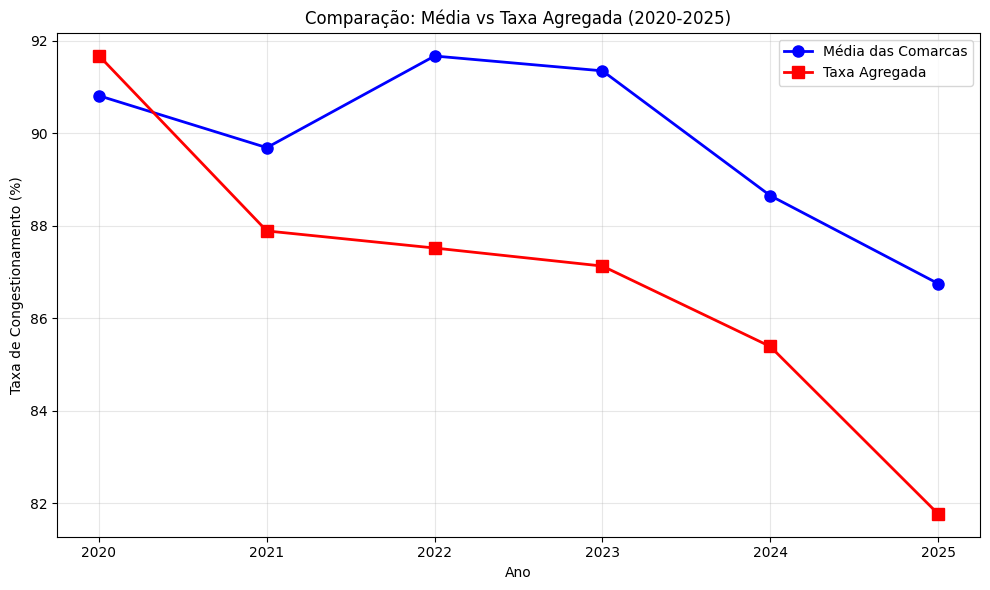


Tabela Comparativa:
Ano 2020: Média = 90.8% | Agregada = 91.7% | Diferença = 0.9pp
Ano 2021: Média = 89.7% | Agregada = 87.9% | Diferença = -1.8pp
Ano 2022: Média = 91.7% | Agregada = 87.5% | Diferença = -4.2pp
Ano 2023: Média = 91.4% | Agregada = 87.1% | Diferença = -4.2pp
Ano 2024: Média = 88.7% | Agregada = 85.4% | Diferença = -3.3pp
Ano 2025: Média = 86.8% | Agregada = 81.8% | Diferença = -5.0pp


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Versão simplificada e segura
fig, ax = plt.subplots(figsize=(10, 6))  # Tamanho seguro

# Converter e filtrar
df_global_anual['ano_str'] = df_global_anual['ano_ref'].astype(str)
anos_interesse = [str(year) for year in range(2020, 2026)]
df_filtrado = df_global_anual[df_global_anual['ano_str'].isin(anos_interesse)]

if df_filtrado.empty:
    print("Sem dados para 2020-2025")
else:
    # Média anual
    taxa_media = df_filtrado.groupby('ano_str')['Taxa_Cong_global_anual (%)'].mean().reset_index()
    taxa_media = taxa_media.sort_values('ano_str')
    
    # Taxa agregada
    agregado = df_filtrado.groupby('ano_str').agg({
        'Distribuidos_ano': 'sum',
        'Baixados_ano': 'sum',
        'Pendentes_fim_ano': 'sum'
    }).reset_index().sort_values('ano_str')
    
    agregado['Taxa_Agregada (%)'] = (agregado['Pendentes_fim_ano'] / 
                                     (agregado['Pendentes_fim_ano'] + agregado['Baixados_ano']) * 100).round(2)
    
    # Plot simples
    ax.plot(taxa_media['ano_str'], taxa_media['Taxa_Cong_global_anual (%)'], 
            'b-o', label='Média das Comarcas', linewidth=2, markersize=8)
    ax.plot(agregado['ano_str'], agregado['Taxa_Agregada (%)'], 
            'r-s', label='Taxa Agregada', linewidth=2, markersize=8)
    
    # Configurações básicas
    ax.set_title('Comparação: Média vs Taxa Agregada (2020-2025)', fontsize=12)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Taxa de Congestionamento (%)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Tabela simples
    print("\nTabela Comparativa:")
    for i in range(len(taxa_media)):
        ano = taxa_media.iloc[i]['ano_str']
        media = taxa_media.iloc[i]['Taxa_Cong_global_anual (%)']
        agreg = agregado.iloc[i]['Taxa_Agregada (%)']
        print(f"Ano {ano}: Média = {media:.1f}% | Agregada = {agreg:.1f}% | Diferença = {agreg-media:.1f}pp")

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys

# Listar os arquivos CSV na pasta 'uploads'
arquivo_csv = glob.glob('uploads/processos_*.csv')
# Carregar os arquivos CSV e concatenar em um único DataFrame
dfs = []
for arquivo in arquivo_csv:  # lista/iterável com os caminhos tipo 'processos_1.csv', 'processos_2.csv', ...
    df_ano = pd.read_csv(arquivo, sep='#', encoding='utf-8')
    dfs.append(df_ano)

df = pd.concat(dfs, ignore_index=True)

# Tratamento de colunas
colunas = df.columns.tolist()
def get_col(nome): return [c for c in colunas if nome in c.lower()][0]

df = df.rename(columns={
    get_col('data_distribuicao'): 'data_distribuicao',
    get_col('data_baixa'): 'data_baixa',
    get_col('nome_area_acao'): 'nome_area_acao',
    get_col('comarca'): 'comarca',
    get_col('serventia'): 'serventia'
})


df['data_distribuicao'] = pd.to_datetime(df['data_distribuicao'], errors='coerce')
df['data_baixa'] = pd.to_datetime(df['data_baixa'], errors='coerce')

# Extrair Anos
df['ano_distribuicao'] = df['data_distribuicao'].dt.year
df['ano_baixa'] = df['data_baixa'].dt.year

# Cálculo da taxa de congestionamento
# Agrupa apenas por ANO, somando tudo.
pendentes_total = df[df['data_baixa'].isna()].groupby('ano_distribuicao').size()
baixados_total = df.dropna(subset=['ano_baixa']).groupby('ano_baixa').size()

df_anual_unificado = pd.DataFrame({
    'Pendentes': pendentes_total,
    'Baixados': baixados_total
}).fillna(0).sort_index()

# Filtrar e Calcular
df_anual_unificado = df_anual_unificado[(df_anual_unificado['Pendentes'] > 0) | (df_anual_unificado['Baixados'] > 0)]
soma_total = df_anual_unificado['Pendentes'] + df_anual_unificado['Baixados']
df_anual_unificado['Taxa de Congestionamento (%)'] = np.where(
    soma_total > 0,
    (df_anual_unificado['Pendentes'] / soma_total) * 100,
    0
).round(1)
df_anual_unificado.index.name = 'Ano'
df_anual_unificado = df_anual_unificado.reset_index()
df_anual_unificado['Ano'] = df_anual_unificado['Ano'].astype(int)

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df_anual_unificado['Ano'], df_anual_unificado['Taxa de Congestionamento (%)'], 
         marker='o', linewidth=2, markersize=8, markerfacecolor='red')

# Adicionar anotações com os valores
for i, row in df_anual_unificado.iterrows():
    plt.annotate(f"{row['Taxa de Congestionamento (%)']:.1f}%", 
                (row['Ano'], row['Taxa de Congestionamento (%)']),
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center',
                fontsize=9)

# Configurações do gráfico
plt.title('Evolução da Taxa de Congestionamento Global', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Taxa de Congestionamento (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df_anual_unificado['Ano'])  # Garantir que todos os anos sejam mostrados como inteiros

# Ajustar limites do eixo Y para melhor visualização
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

# Criar tabela com os resultados
tabela_resultados = df_anual_unificado.copy()

print("\nTabela de Resultados:")
print("=" * 60)
print(f"{'Ano':<8} {'Baixados':<12} {'Pendentes':<12} {'Taxa Cong. (%)':<15}")
print("-" * 60)
for _, row in tabela_resultados.iterrows():
    print(f"{int(row['Ano']):<8} {int(row['Baixados']):<12} {int(row['Pendentes']):<12} {row['Taxa de Congestionamento (%)']:<15.2f}")

# DataFrame formatado para uso posterior
df_tabela_final = tabela_resultados[['Ano', 'Baixados', 'Pendentes', 'Taxa de Congestionamento (%)']].copy()
df_tabela_final['Ano'] = df_tabela_final['Ano'].astype(int)
df_tabela_final['Baixados'] = df_tabela_final['Baixados'].astype(int)
df_tabela_final['Pendentes'] = df_tabela_final['Pendentes'].astype(int)

# Exibir informações sobre os dados processados
print(f"\nResumo do Processamento:")
print(f"Total de arquivos CSV processados: {len(arquivo_csv)}")
print(f"Período analisado: {df_tabela_final['Ano'].min()} a {df_tabela_final['Ano'].max()}")
print(f"Total de registros processados: {len(df)}")

KeyError: 'data_distribuicao'

In [10]:
df.head()

,numero,data_distribuicao,data_baixa,PRIORIDADE,comarca,serventia,nome_area_acao,SEGREDO_JUSTICA,CODG_CLASSE,CODG_ASSUNTOS,ano_distribuicao,mes_distribuicao,dia_distribuicao,ano_baixa,mes_baixa,dia_baixa
0,0000309-94.0040.8.09.0034,1940-04-09,2014-10-08,Normal,CORUMBÁ DE GOIÁS,Corumbá de Goiás - 2ª Vara Cível,Cível,True,34.0,9160,1940.0,4.0,9.0,2014.0,10.0,8.0
1,0000217-59.1942.8.09.0128,1942-08-24,2014-06-30,Normal,PLANALTINA,Planaltina - Vara de Família e Sucessões,Família - Interior,True,39.0,9160,1942.0,8.0,24.0,2014.0,6.0,30.0
2,0000366-68.0047.8.09.0034,1947-07-22,2014-09-30,Normal,CORUMBÁ DE GOIÁS,Corumbá de Goiás - 2ª Vara Cível,Cível,True,34.0,9160,1947.0,7.0,22.0,2014.0,9.0,30.0
3,0347375-90.2010.8.09.0051,1972-03-15,2014-07-02,Normal,GOIÂNIA,Goiânia - UPJ Varas da Fazenda Pública Estadua...,UPJ Fazenda Pública Estadual,True,90.0,9160,1972.0,3.0,15.0,2014.0,7.0,2.0
4,0347440-85.2010.8.09.0051,1972-03-15,2014-07-02,Normal,GOIÂNIA,Goiânia - UPJ Varas da Fazenda Pública Estadua...,UPJ Fazenda Pública Estadual,True,90.0,9160,1972.0,3.0,15.0,2014.0,7.0,2.0
